## Install necessary packages



In [1]:
install.packages("tidyverse")
install.packages("tidytext")
install.packages("tm")
install.packages("stm")
install.packages("ggplot2")
install.packages("RColorBrewer")
install.packages("reshape2")
install.packages("LDAvis")
install.packages("servr")


The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

  There is a binary version available but the source version is later:
   binary source needs_compilation
tm  0.7-8  0.7-9              TRUE



installing the source package ‘tm’





The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages

The downloaded binary packages are in
	/var/folders/1p/ckvnc5vx4jzb6hrt955g92kw0000gn/T//RtmpORGjfV/downloaded_packages


## Load libraries



In [2]:
library(tidyverse)
library(tidytext)
library(stm)
library(ggplot2)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



## Load dataset



In [3]:
data <- read.csv("https://raw.githubusercontent.com/textmining-infopros/chapter4/master/4c_dataset.csv?token=ARBWLQ3RCKTIK7PFAPDEUD3ACZJYA")

## Text pre-processing



In [4]:
processed <- textProcessor(data$Title, removepunctuation = TRUE, metadata = data)
out <- prepDocuments(processed$documents,processed$vocab, processed$meta)
docs <- out$documents
vocab <- out$vocab
meta <- out$meta

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 157 of 280 terms (157 of 933 tokens) due to frequency 
Your corpus now has 98 documents, 123 terms and 776 tokens.

## Running Structural Topic Modeling (STM)



In [5]:
STM <- stm(documents = out$documents, vocab = out$vocab, K=5, prevalence =~ Year, max.em.its = 75, data = out$meta, init.type = "Spectral", verbose = FALSE)

## Plotting top words using stm package



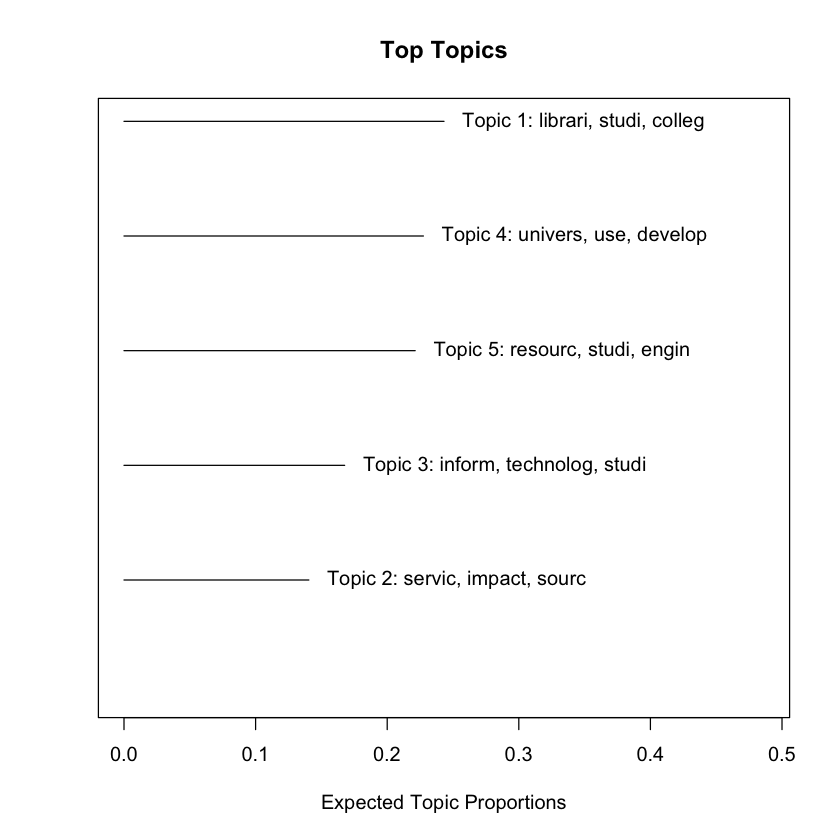

In [6]:
plot(STM)

## Plotting MAP histogram using stm package



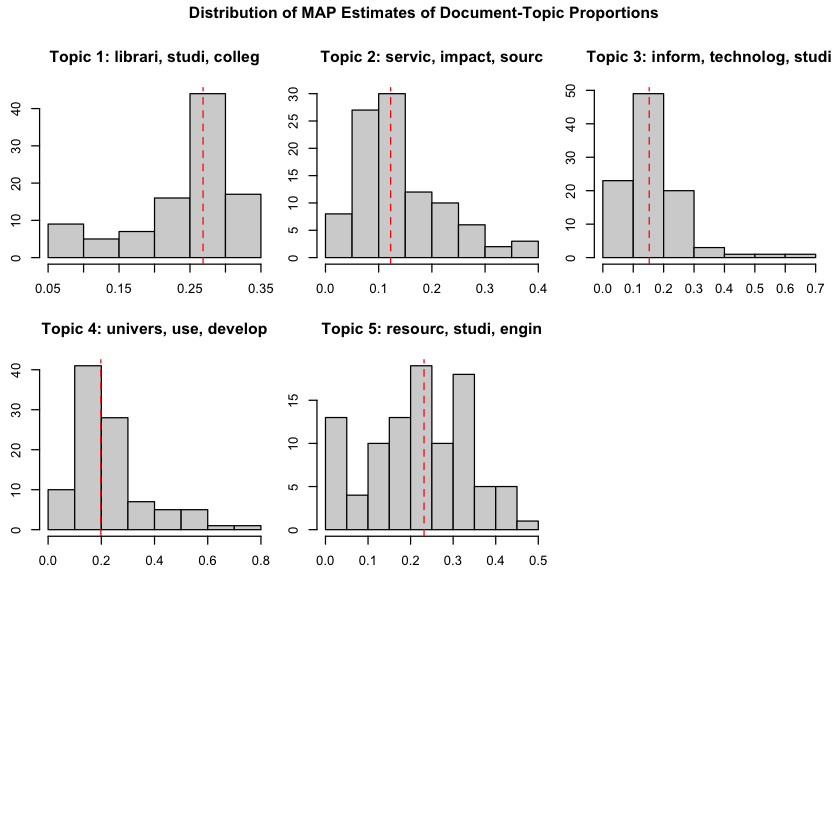

In [7]:
plot(STM, type="hist")

## Visualizing topic model using ggplot2



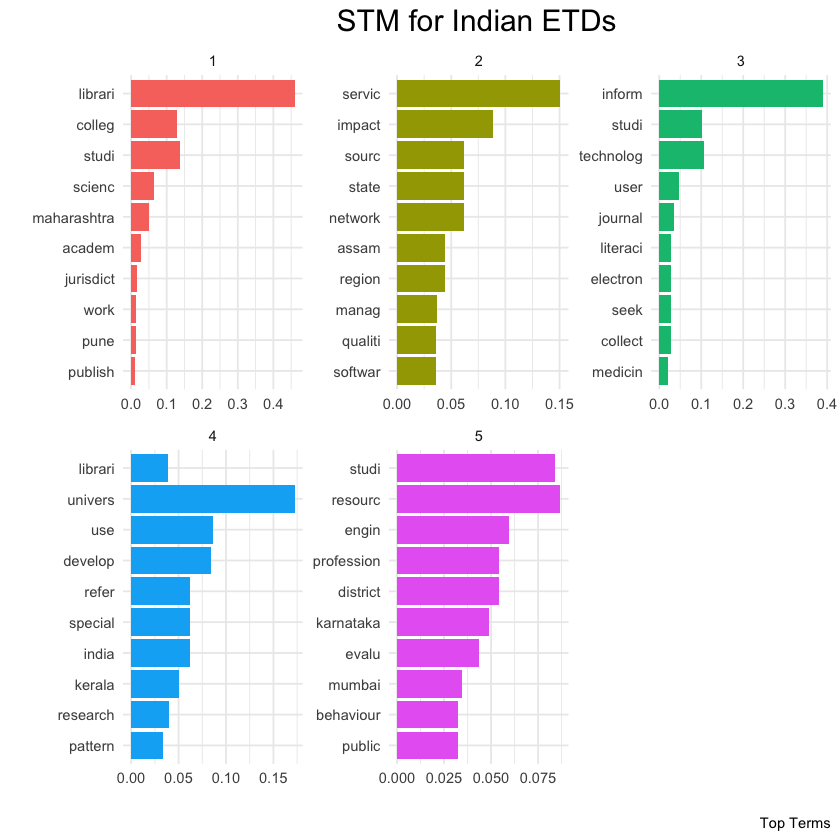

In [8]:
topics <- tidy(STM, matrix = "beta")
top_terms <- topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 18)) +
  labs(title="STM for Indian ETDs", caption="Top Terms") +
  ylab("") +
  xlab("") +
  coord_flip()

## Interactive Visualization



In [12]:
ldavis <- toLDAvis(STM, docs, R = 5,
		   plot.opts = list(xlab = "PC1", ylab ="PC2"),
		   lambda.step = 0.1,
		   out.dir = "LDAvis",
		   open.browser = FALSE,
		   as.gist = FALSE,
		   reorder.topics = TRUE)

Warning message in dir.create(out.dir):
“'LDAvis' already exists”


## Understanding topics through top 5 representative documents



In [10]:
findThoughts(STM, texts = data$Title, n = 5, topics = 5)


 Topic 5: 
 	 Professional attitudes of librarians towards information and communication technology: a survey of engineering college libraries in north coastal Andhra Pradesh
 	Study the attitude of B.Ed Student teachers towards digital library and e resources of jalgaon District m s
 	Information communication technology skills among the library professionals of Engineering Colleges in Karnataka an analytical study
 	Studies on the information seeking users behaviour of few selective government public and private funded R D libraries information centres in Jharkhand
 	Information literacy of management students in Mumbai metropolitan area

## Topic correlation



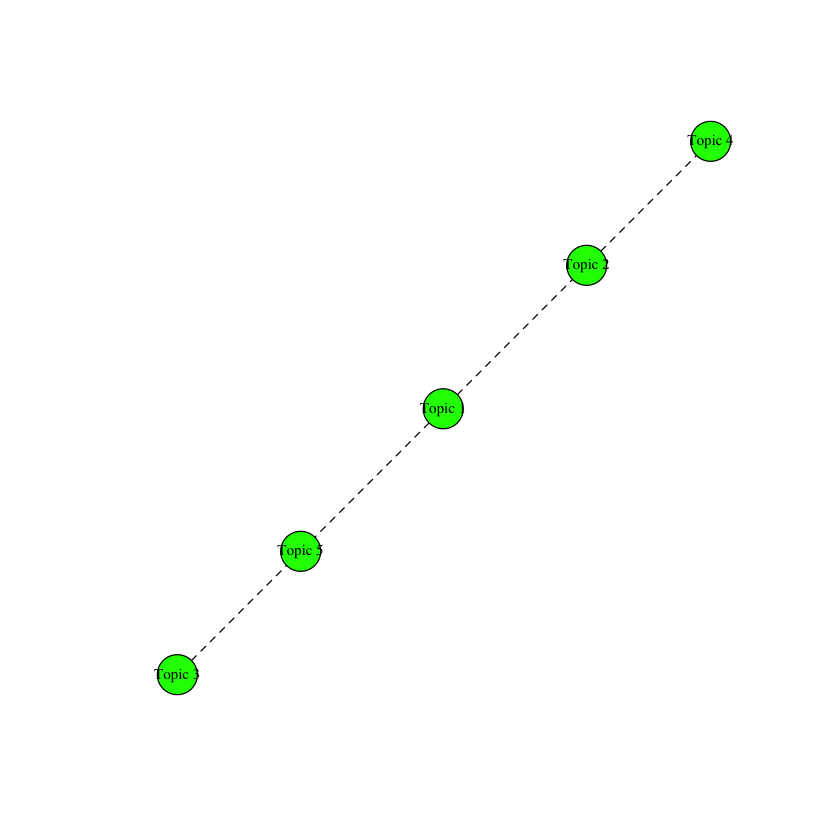

In [11]:
topicor <- topicCorr(STM)
plot(topicor)